### **TRACCIA ESAME:**

**Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " ! Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.**

#### 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati


#### 2. Si chiede di trovare, per ogni continente:
   - **a.** Il numero di casi fin dall'inizio della pandemia.
   - **b.** La percentuale rispetto al totale mondiale del numero di casi.


#### 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
   - **a.** L'evoluzione del casi totali dall'inizio alla fine dell'anno.
   - **b.** Il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.


#### 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso):
   - **a.** Scrivere un breve commento a riguardo.


#### 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
   - **a.** Mostrare la somma dei pazienti ospitalizzati per ognuna.
   - **b.** Se ci sono dati nulli, con un breve commento scrivere se puo essere possibile gestirli tramite sostituzione o meno


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare il file
df = pd.read_excel("owid-covid-data.xlsx")

---
#### 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati


In [61]:
# Visualizzare le prime righe del detaset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [95]:
# Visualizzare le informazioni generali per ogni singola colonna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [97]:
# Controllare la dimensione e informazioni del dataset
print("Dimensione del dataset:", df.shape)

Dimensione del dataset: (429435, 67)


In [99]:
# Visualizzare alcuni descrittori statistici di base
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [101]:
# Controllare un campione casuale di elementi del dataset
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120278,OWID_EUN,NaN,European Union (27),2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
205633,LVA,Europe,Latvia,2020-09-28,1676.0,0.0,21.57,36.0,0.0,0.00,...,51.0,NaN,5.57,75.29,0.87,1850654,NaN,NaN,NaN,NaN
227344,MWI,Africa,Malawi,2021-02-08,26875.0,0.0,482.57,842.0,0.0,19.29,...,24.7,8.70,1.30,64.26,0.48,20405318,NaN,NaN,NaN,NaN
122819,OWID_EUN,NaN,European Union (27),2023-05-05,183186398.0,0.0,16467.29,1235954.0,0.0,184.14,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
84564,CIV,Africa,Cote d'Ivoire,2022-05-04,81930.0,0.0,6.14,799.0,0.0,0.00,...,NaN,19.35,NaN,57.78,0.54,28160548,NaN,NaN,NaN,NaN


---
#### 2. Si chiede di trovare, per ogni continente:
   - **a.** Il numero di casi fin dall'inizio della pandemia.
   - **b.** La percentuale rispetto al totale mondiale del numero di casi.

In [187]:
# Raggruppare per continente e sommare i casi totali
df_continent = df.groupby("continent")[["total_cases"]].max()

# Calcolare la percentuale
df_continent["percentuale_mondiale"] = (df_continent["total_cases"] / df["total_cases"].max()) * 100
df_continent

,total_cases,percentuale_mondiale
continent,,
Africa,4072765.0,0.524931
Asia,99373219.0,12.808026
Europe,38997490.0,5.026313
North America,103436829.0,13.331777
Oceania,11861161.0,1.528763
South America,37511921.0,4.834840


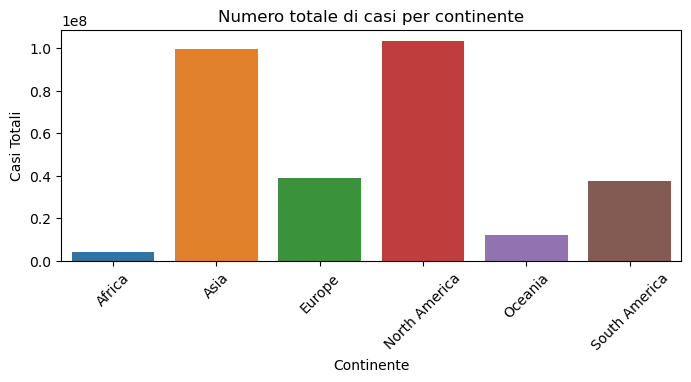

In [189]:
# Grafico a barre per visualizzare i casi totali per continente
plt.figure(figsize=(8, 3))
sns.barplot(x=df_continent.index, y=df_continent["total_cases"], hue=df_continent.index, legend=False)
plt.xlabel("Continente")
plt.ylabel("Casi Totali")
plt.title("Numero totale di casi per continente")
plt.xticks(rotation=45)
plt.show()

---
#### 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
   - **a.** L'evoluzione del casi totali dall'inizio alla fine dell'anno.
   - **b.** Il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.

In [191]:
# Selezionare dati per Italia nel 2022
df_italy = df[(df["location"] == "Italy") & (df["date"] >= "2022-01-01") & (df["date"] <= "2022-12-31")]

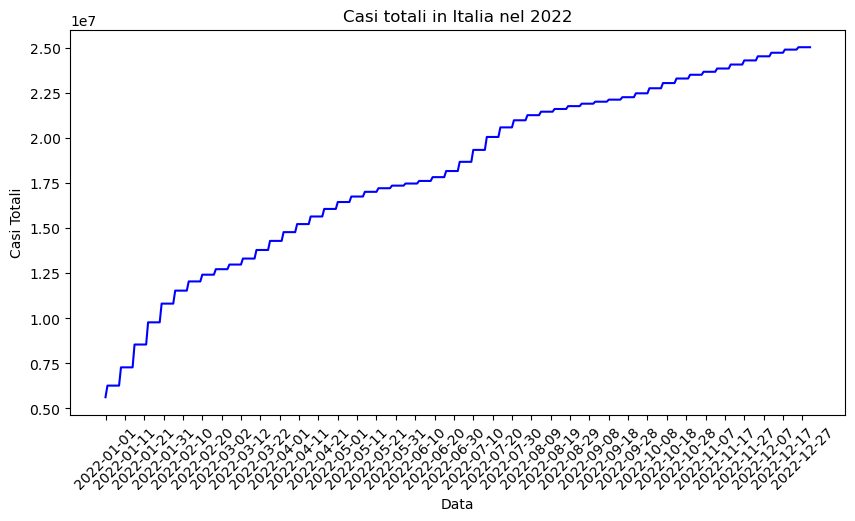

In [193]:
# Creare un grafico con i casi totali in Italia nel 2022
plt.figure(figsize=(10, 5))
plt.plot(df_italy["date"], df_italy["total_cases"], color="blue")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.title("Casi totali in Italia nel 2022")
plt.xticks(df_italy["date"][::10], rotation=45)  # Mostra una data ogni 10 --> Questo perche a causa di troppi dati si creava la sovrapposizione delle date
plt.show()


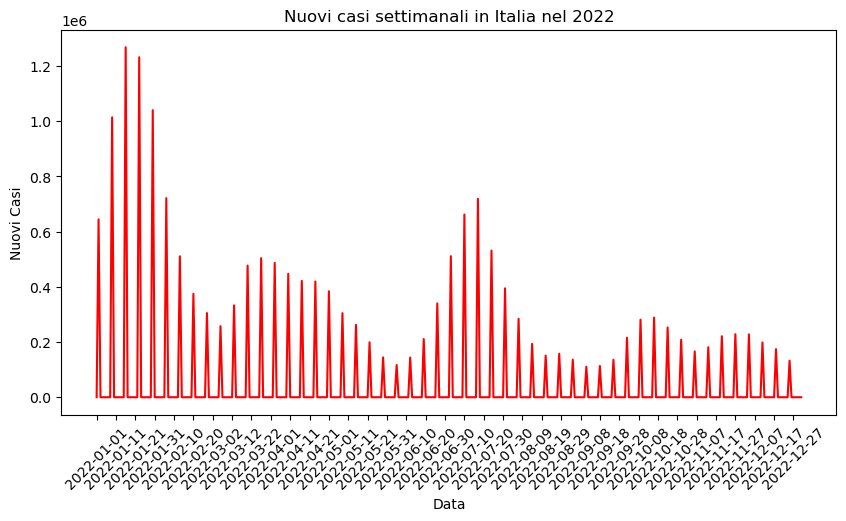

In [195]:
# Creare un grafico per nuovi casi settimanali in Italia
plt.figure(figsize=(10, 5))
df_italy_weekly = df_italy.dropna(subset=["new_cases"])
plt.plot(df_italy_weekly["date"], df_italy_weekly["new_cases"], color="red")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.title("Nuovi casi settimanali in Italia nel 2022")
plt.xticks(rotation=45)
plt.xticks(df_italy_weekly["date"][::10], rotation=45)  # Mostra una data ogni 10 --> Questo perche a causa di troppi dati si creava la sovrapposizione delle date
plt.show()

---
#### 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso):
   - **a.** Scrivere un breve commento a riguardo.

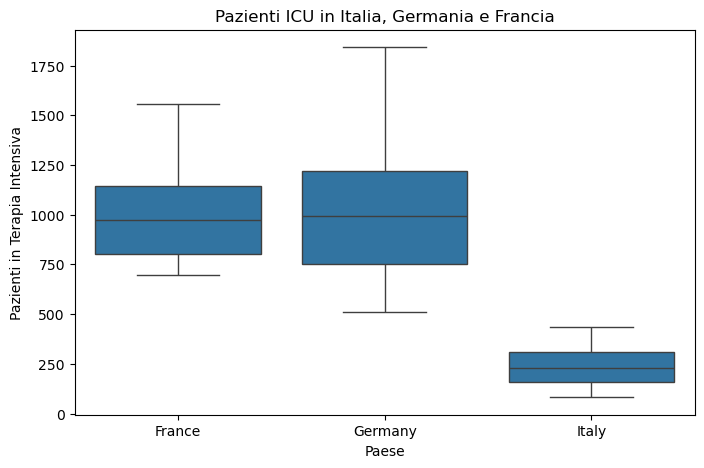

In [197]:
# Boxplot per pazienti in terapia intensiva in Italia, Germania e Francia tra Maggio 2022 e Aprile 2023
df_icu = df[(df["location"].isin(["Italy", "Germany", "France"])) & 
            (df["date"] >= "2022-05-01") & (df["date"] <= "2023-04-30")]
plt.figure(figsize=(8, 5))
sns.boxplot(x="location", y="icu_patients", data=df_icu)
plt.title("Pazienti ICU in Italia, Germania e Francia")
plt.xlabel("Paese")
plt.ylabel("Pazienti in Terapia Intensiva")
plt.show()
# Non sono riuscito a trovare un modo per mettere il boxplot nell'ordine: Italia, Germania e Francia all'ultimo per mantenere l'ordine della traccia


# Analisi del boxplot:
# Il boxplot mostra differenze evidenti tra i tre paesi in termini di pazienti in terapia intensiva.
# L'Italia presenta valori medi più bassi rispetto a Germania e Francia, indicando una pressione minore sulle terapie intensive.
# Germania e Francia hanno mediane più alte e una maggiore dispersione dei dati, con la presenza di outlier che potrebbero indicare picchi improvvisi di ricoveri in alcuni periodi.

---
#### 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
   - **a.** Mostrare la somma dei pazienti ospitalizzati per ognuna.
   - **b.** Se ci sono dati nulli, con un breve commento scrivere se puo essere possibile gestirli tramite sostituzione o meno

In [199]:
# Sommare i pazienti ospedalizzati nel 2023 per Italia, Germania, Francia e Spagna
df_hosp = df[(df["location"].isin(["Italy", "Germany", "France", "Spain"])) &
             (df["date"] >= "2023-01-01") & (df["date"] <= "2023-12-31")]
hospitalized_totals = df_hosp.groupby("location")[["hosp_patients"]].sum()
hospitalized_totals

,hosp_patients
location,
France,1382574.0
Germany,0.0
Italy,1175272.0
Spain,354602.0


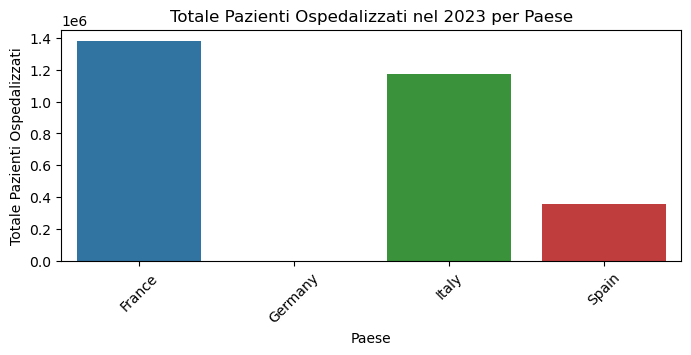

In [212]:
# Grafico a barre per visualizzare la somma dei pazienti ospedalizzati per paese
plt.figure(figsize=(8, 3))
sns.barplot(x=hospitalized_totals.index, y=hospitalized_totals["hosp_patients"], hue=hospitalized_totals.index, legend=False)
plt.xlabel("Paese")
plt.ylabel("Totale Pazienti Ospedalizzati")
plt.title("Totale Pazienti Ospedalizzati nel 2023 per Paese")
plt.xticks(rotation=45)
plt.show()

In [201]:
# Verificare la presenza di valori nulli
df_nulls = df_hosp[["location", "hosp_patients"]].isnull().sum()
print("Valori nulli trovati:")
print(df_nulls)

# Commento sulla gestione dei dati nulli
if df_nulls.sum() > 0:
    print("Ci sono dati nulli nei pazienti ospedalizzati. Si può considerare la sostituzione con la media o con interpolazione se i dati lo permettono, oppure rimuovere le righe se la quantità di dati mancanti è minima.")
else:
    print("Non ci sono dati nulli nei pazienti ospedalizzati.")

Valori nulli trovati:
location           0
hosp_patients    843
dtype: int64
Ci sono dati nulli nei pazienti ospedalizzati. Si può considerare la sostituzione con la media o con interpolazione se i dati lo permettono, oppure rimuovere le righe se la quantità di dati mancanti è minima.
